# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 10

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [111]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as sps
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor


---
## Задача 1

Перед обучением линейной регрессии вы могли совершать некоторые преобразования над признаками. Какие преобразования стоит совершить перед обучением решающего дерева?

В частности, ответьте на вопрос, имеет ли смысл примененять следующие преобразования:
* монотонные функции от одного признака;
* немонотонные функции от одного признака;
* линейные функции от нескольких признаков;
* нелинейные функции от нескольких признаков;
* стандартизация признаков;
* преобразования категориальных признаков.

Например, вместо/дополнительно с признаком $x_j$ рассматривать признак $f(x_j)$, для указанных выше типов функций.

Монотонные и немотоннын функции от одного признака не вносят значимый вклад в модель, значит это не имеет смысла их применение. Решающее дерево может само определить оптимальные разделения в зависимости от значений признаков. Дерево может обрабатывать нелинейные зависимости без дополнительных преобразований.

Линейные и нелинейные функции от нескольких переменных тоже не имеют смысла, признаки в решающем дереве оцениваются независимо друг от друга, решающее дерево способоно моделировать линейную и нелинейную( уже представлено в структуре дерева, это мб избыточно) зависимости.

Стандартизация не требуется. Так как используются пороговые значениия для разделения данных. Изменение масштаба не повлияет на результаты.


Решающие деревья могут работать с категориальными признаками напрямую без необходимости преобразования. Но часто используются методы кодирования категориальных признаков, такие как one-hot encoding или label encoding, чтобы представить категориальные значения в числовой форме.




## Задача 2

### 1. Загрузка и предобработка данных.




Скачайте [данные](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification) по классификации кристаллических решеток. Целевой переменной в этой задаче является `Lowest distortion`. С сырыми данными и более подробным описанием задачи можно ознакомиться также [здесь](https://www.kaggle.com/datasets/sayansh001/crystal-structure-classification).


In [11]:
data = pd.read_csv('Crystal_structure.csv')


Сделаем предобработку данных.

In [12]:
# уберем признаки, которые нам не нужны (подробнее можете почиать во вкладке 'Code' на странице датасета)
data = data.drop(["In literature", "Compound", "τ"], axis=1)
# убираем объекты, для которых неизвестен таргет
data = data.drop(data[data["Lowest distortion"] == "-"].index).reset_index(drop=True)
# закодируем целевую переменную числами
data['Lowest distortion'] = LabelEncoder().fit_transform(data['Lowest distortion'])
# закодируем категориальные признаки числами
data['A'] = LabelEncoder().fit_transform(data['A'])
data['B'] = LabelEncoder().fit_transform(data['B'])
# обработаем пропуски
for i in data.columns:
    column = data[i]
    for k in range(len(column)):
        if column[k] == '-':
            column[k] = 0
    data[i] = column

<ipython-input-12-f38e7e003adc>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[k] = 0


### 2. Обучение модели


Создайте массив признаков и массив таргета.

In [13]:
X = data.drop('Lowest distortion', axis=1)
y = data['Lowest distortion']


Обучите модель решающего дерева.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

Сделайте предсказание для тестовой выборки.

In [16]:
y_pred = clf.predict(X_test)

Создайте массив, показывающий успех или не успех модели (1 если модель угадала класс, 0 если не угадала).

In [20]:
array = np.zeros(len(y_pred))
for i in range(len(y_pred)):
  if y_pred[i] == y_test.iloc[i]:
    array[i] = 1
array

array([0., 1., 1., ..., 1., 1., 0.])

Вы получили выборку из распределения $Bern(\theta)$. Постройте доверительный интервал для $\theta$.

In [32]:
def bernoulli_interval(array, alpha=0.05):
  n = len(array)
  t = sps.t.ppf((1+alpha)/2, n-1)

  mean = np.mean(array)
  std = np.sqrt((mean*(1-mean)) / n)

  low = mean - (std / np.sqrt(n-1)) * t
  high = mean + (std / np.sqrt(n-1)) * t

  return (low, high)
bernoulli_interval(array, alpha=0.05)

(0.6967600525165255, 0.6967964857020469)

Повторите все шаги для случайного леса. Сравните полученные интервалы.

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred_f = model.predict(X_test)

array_f = np.zeros(len(y_pred_f))
for i in range(len(y_pred_f)):
  if y_pred_f[i] == y_test.iloc[i]:
    array_f[i] = 1

bernoulli_interval(array_f, alpha=0.05)


(0.7788843746934913, 0.7789172677575511)

**Выводы:** Результаты случайного леса и решающего дерева различны.  Случайный лес по результатам предсказывает более точно, чем решающее дерево. Это происходит так, потому что в случайном лесе усредняется предсказание множества деревьев.

## Задача 3

Рассмотрим данные из <a href='https://miptstats.github.io/courses/ad_mipt/hw8.html' target="_blank">предыдущего домашнего задания</a>. Скачайте данные и разделите их на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1.

Выполните необходимые преобразования признаков.

*Замечание.* Если в валидационной и/или тестовой частях есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать, но в то же время выбросы вносят существенный вклад в значение метрики. 

In [88]:
data = pd.read_csv('parkinsons_updrs.data', sep=',')

data.drop('motor_UPDRS', axis=1, inplace=True)

X = data.drop(['total_UPDRS', 'subject#'], axis=1)
y = data['total_UPDRS']
groups = data['subject#']



gss = GroupShuffleSplit(n_splits=1, test_size=0.2)
train_ind_v, test_ind = next(gss.split(X, y, groups))

X_train_v, y_train_v = X.iloc[train_ind_v], y.iloc[train_ind_v]
X_test, y_test = X.iloc[test_ind], y.iloc[test_ind]


test_groups = groups.iloc[test_ind]
train_all_groups = groups.iloc[train_ind_v]

In [89]:
gss_val = GroupShuffleSplit(n_splits=1, test_size=0.25)
train_ind, val_ind = next(gss_val.split(X_train_v,  y_train_v, groups=train_all_groups))

X_train, y_train = X_train_v.iloc[train_ind],  y_train_v.iloc[train_ind]
X_val, y_val = X_train_v.iloc[val_ind],  y_train_v.iloc[val_ind]

val_groups = groups.iloc[val_ind]
train_groups = groups.iloc[train_ind]

Обучите решающее дерево глубины 3 и визуализируйте его. 

*Рекомендуется сделать скриншот визуализации и прислать его в бот вместе с ноутбуком.*

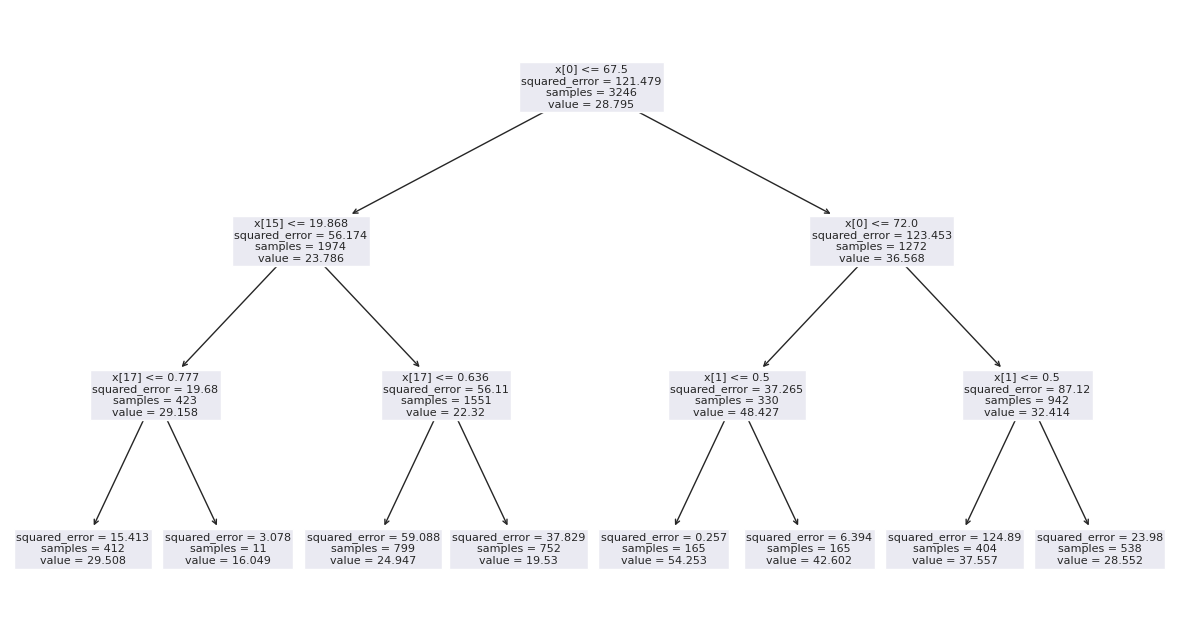

In [90]:
rg = DecisionTreeRegressor(max_depth=3)
rg.fit(X_train, y_train)

plt.figure(figsize=(15,8))
sns.set(font_scale=1.5)
plot_tree(rg);


Подберите оптимальное значение максимальной глубины дерева. Для этого обучите решающие деревья с выставленным значением соответствующего гиперпараметра и посчитайте ошибку предсказаний каждого из них на валидационной выборке. Постройте соответствующий график.

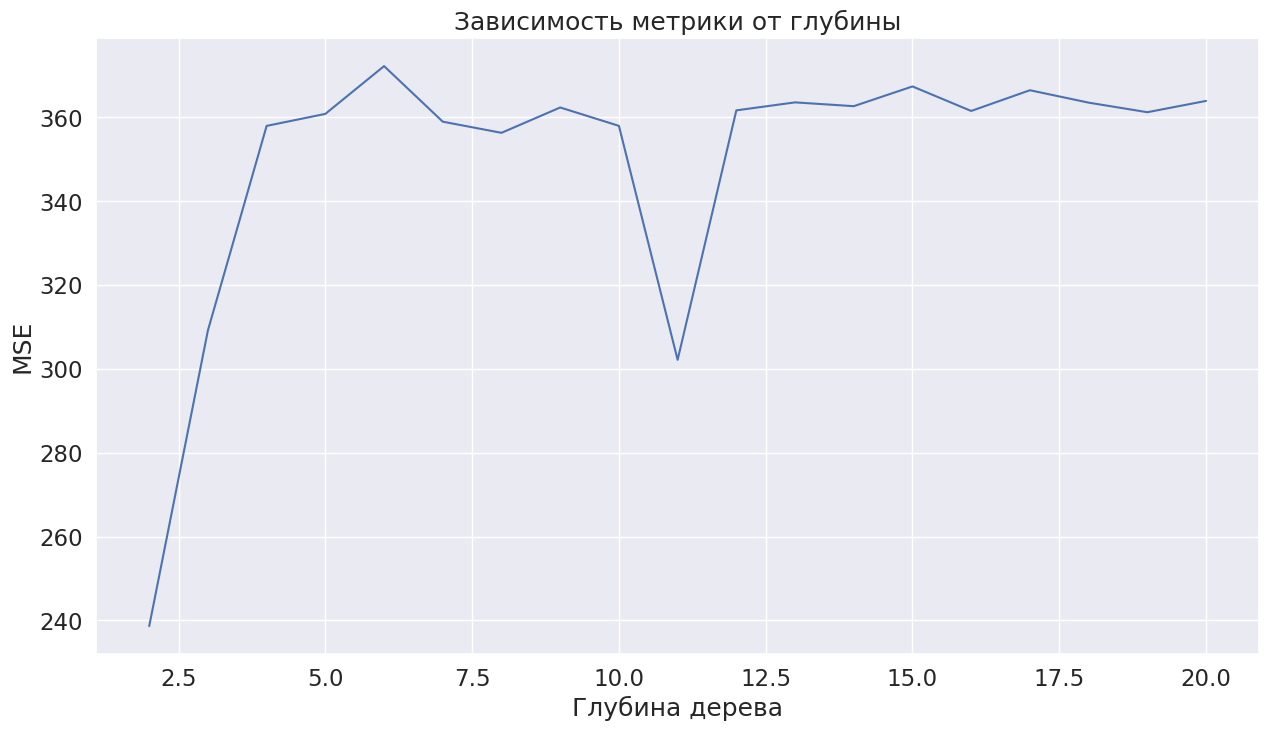

In [91]:
max_depth = np.arange(2, 21, 1)
y_values = []

for max in max_depth:
  rg = DecisionTreeRegressor(max_depth=max)
  rg.fit(X_train, y_train)
  y_pred = rg.predict(X_val)
  y_values.append(mean_squared_error(y_val, y_pred))


plt.figure(figsize=(15,8))
plt.plot(max_depth, y_values)
plt.ylabel('MSE');
plt.xlabel("Глубина дерева")
plt.title("Зависимость метрики от глубины");

In [92]:
for depth, err in zip(max_depth, y_values):
    print(depth, err)

2 238.63074596123522
3 309.1832743105907
4 357.95238467284423
5 360.81715880212005
6 372.2126684369174
7 358.95660775960033
8 356.29871638149626
9 362.3441043715165
10 357.9581904042803
11 302.1482413233547
12 361.6553661963471
13 363.56162214081843
14 362.6540899585225
15 367.3634094376945
16 361.5149020886975
17 366.4593258405566
18 363.4990641226277
19 361.21493138175185
20 363.90919045474453


Оптимальным значение- 11. При 2, скорее всего, переобучение

Аналогичным образом подберите минимальное число объектов в листе, зафиксировав при этом подобранное значение максимальной глубины.

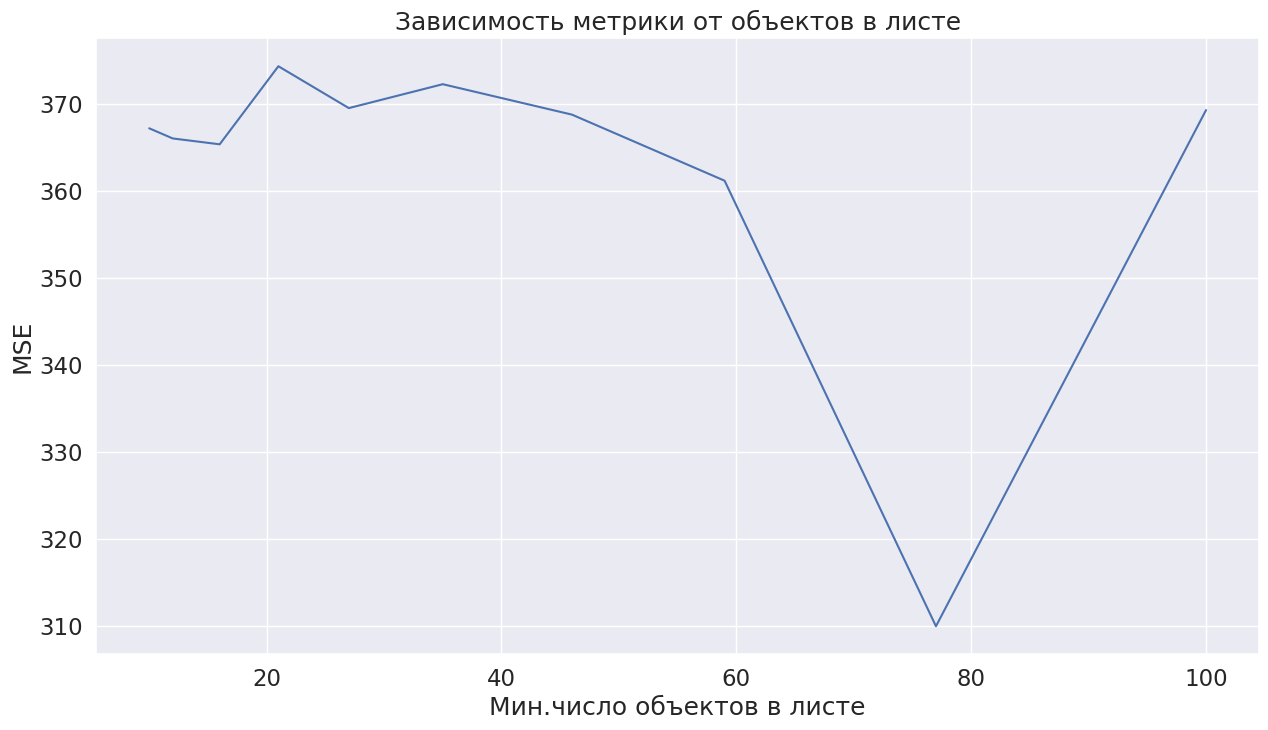

In [94]:
min_samples_leaf =  np.logspace(1, 2, 10, dtype=int)
y_values = []

for min in min_samples_leaf:
  rg = DecisionTreeRegressor(min_samples_leaf=min)
  rg.fit(X_train, y_train)
  y_pred = rg.predict(X_val)
  y_values.append(mean_squared_error(y_val, y_pred))


plt.figure(figsize=(15,8))
plt.plot(min_samples_leaf, y_values)
plt.ylabel('MSE');
plt.xlabel("Мин.число объектов в листе")
plt.title("Зависимость метрики от объектов в листе");

In [95]:
for leaf, err in zip(min_samples_leaf, y_values):
    print(leaf, err)

10 367.15688873873324
12 365.99125605000165
16 365.3160738935527
21 374.2901368113166
27 369.47956993037525
35 372.22680261993514
46 368.7296619319827
59 361.13252558316634
77 309.914320880705
100 369.2480230504813


Оптимальное значение-77

Визуализируйте дерево при оптимальных гиперпараметрах и посчитайте его ошибку на тестовой части выборки.

In [104]:
rg = DecisionTreeRegressor(max_depth=11, min_samples_leaf=77)
rg.fit(X_train_v, y_train_v)
y_pred = rg.predict(X_test)
mean_squared_error(y_test, y_pred)

264.94771495096677

Решающее дерево позволяет оценить *важность признаков* &mdash; некоторая величина, зависящая от того
* насколько часто тот или иной признак использовался при разбиении листа, 
* и насколько сильно при этом изменился критерий информативности.

У обученной модели значения важности признаков лежат в поле `feature_importances_`. Визуализируйте их с помощью `seaborn.barplot`.

In [105]:
for name, score in zip(X_train.columns, rg.feature_importances_):
    print(name, score)

age 0.7407658762482923
sex 0.1295645535922541
test_time 0.013126112548368315
Jitter(%) 0.0
Jitter(Abs) 0.004908014729193673
Jitter:RAP 0.0
Jitter:PPQ5 0.0
Jitter:DDP 0.0
Shimmer 0.0
Shimmer(dB) 0.0
Shimmer:APQ3 0.0
Shimmer:APQ5 0.0
Shimmer:APQ11 0.0036644405925155255
Shimmer:DDA 0.004066914260473743
NHR 0.0
HNR 0.008044622584651114
RPDE 0.0
DFA 0.09585946544425122
PPE 0.0


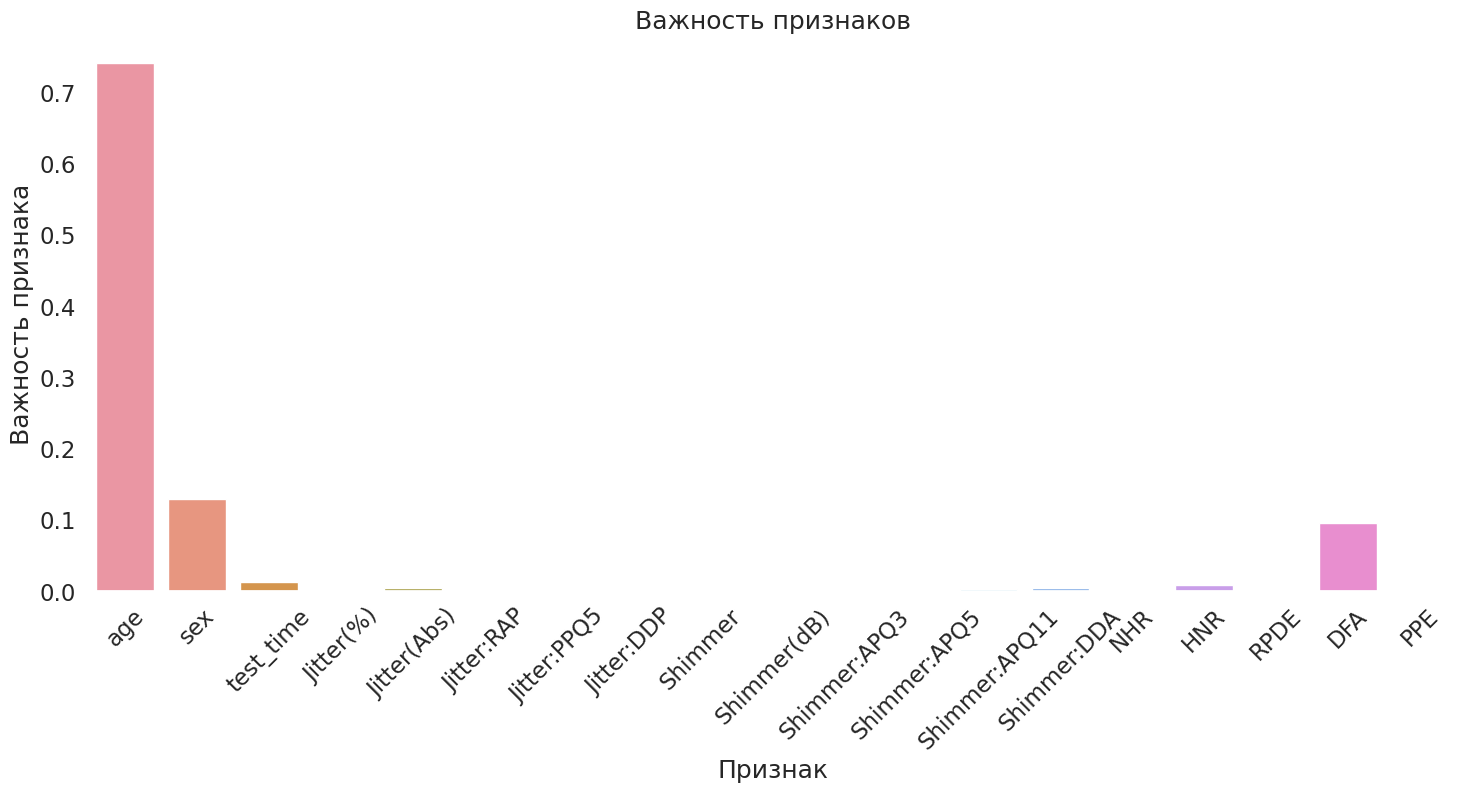

In [108]:
plt.figure(figsize=(15, 8), facecolor='white')

gr = pd.DataFrame({'name': X_train.columns, 'score': rg.feature_importances_})
sns.barplot(x="name", y="score", data=gr)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Важность признака')
plt.xlabel("Признак")
plt.title("Важность признаков");

Сделайте выводы.




**Вывод:** Из графика видно, что разные признаки имеют разную степень важность для модели дерева. Наибольщее влияние на результат модели оказывают признаки: возраст, пол и DFA

## Задача 4

Для данных из задачи 3 обучите случайный лес на 500 деревьев.

In [110]:
forest = RandomForestRegressor(n_estimators=500)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [113]:
y_pred = forest.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
mse

191.4576152613153

Постройте график зависимости ошибки модели в зависимости от количества деревьев для обучающей и валидационной выборок.

*Замечание.* Не нужно заново обучать лес каждый раз. Используйте у *обученной* модели поле `estimators_`, это список из объектов класса `DecisionTreeRegressor`. Обратите внимание, что это приватное поле объекта, и менять его очень плохо, за такое баллы будут снижаться.

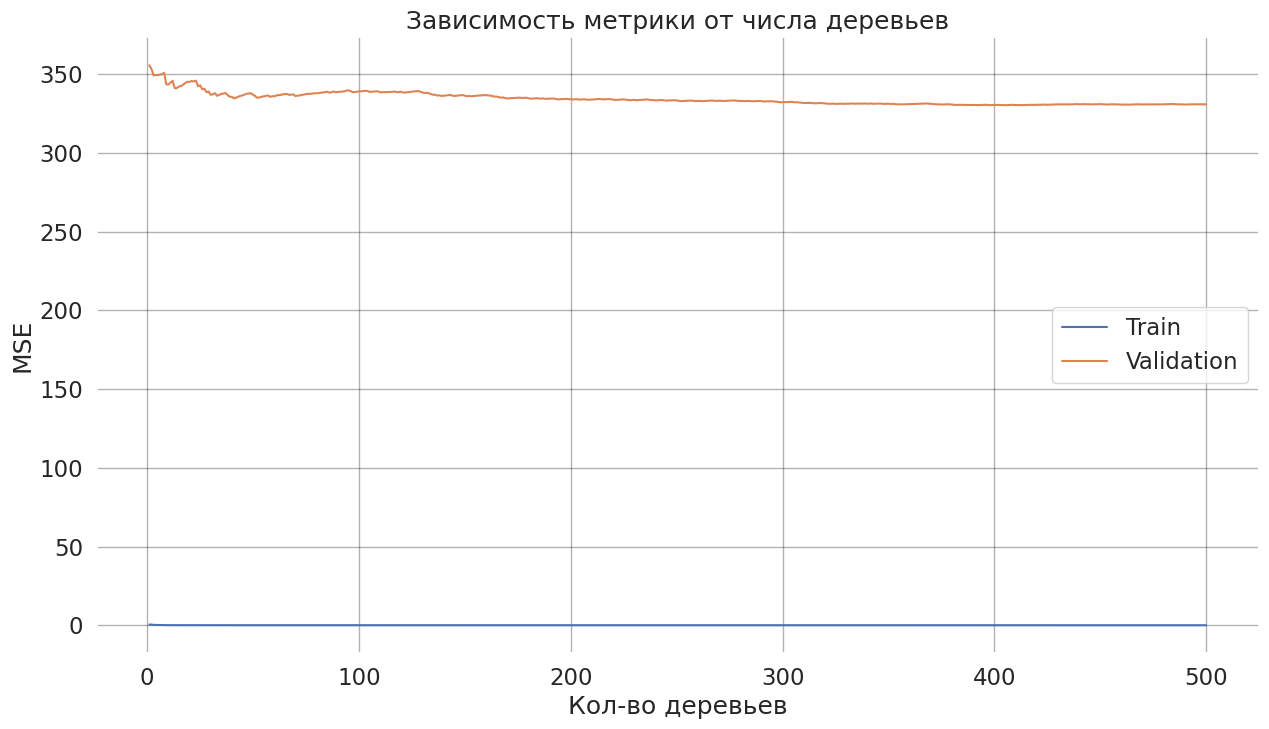

In [121]:
plt.figure(figsize=(15,8))

forest = RandomForestRegressor(n_estimators=500)

x_values = np.arange(1, 501)
y_train_values = []
y_val_values = []

forest.fit(X_train, y_train)
ests = forest.estimators_

for est in range(1, 501):
  c_forest = forest
  c_forest.estimators_ = ests[:est]
  y_pred_t = c_forest.predict(X_train)
  y_train_values.append(mean_squared_error(y_pred_t, y_train))

  y_pred_v = c_forest.predict(X_val)
  y_val_values.append(mean_squared_error(y_pred_v, y_val))

plt.ylabel('MSE');
plt.xlabel("Кол-во деревьев");
plt.title("Зависимость метрики от числа деревьев");
plt.plot(x_values, y_train_values, label='Train');
plt.plot(x_values, y_val_values, label='Validation');
plt.grid(color='black', alpha=0.3)
plt.legend();

Для леса с максимальным количеством деревьев визуализируйте
важность признаков, используя поле `feature_importances_`. 

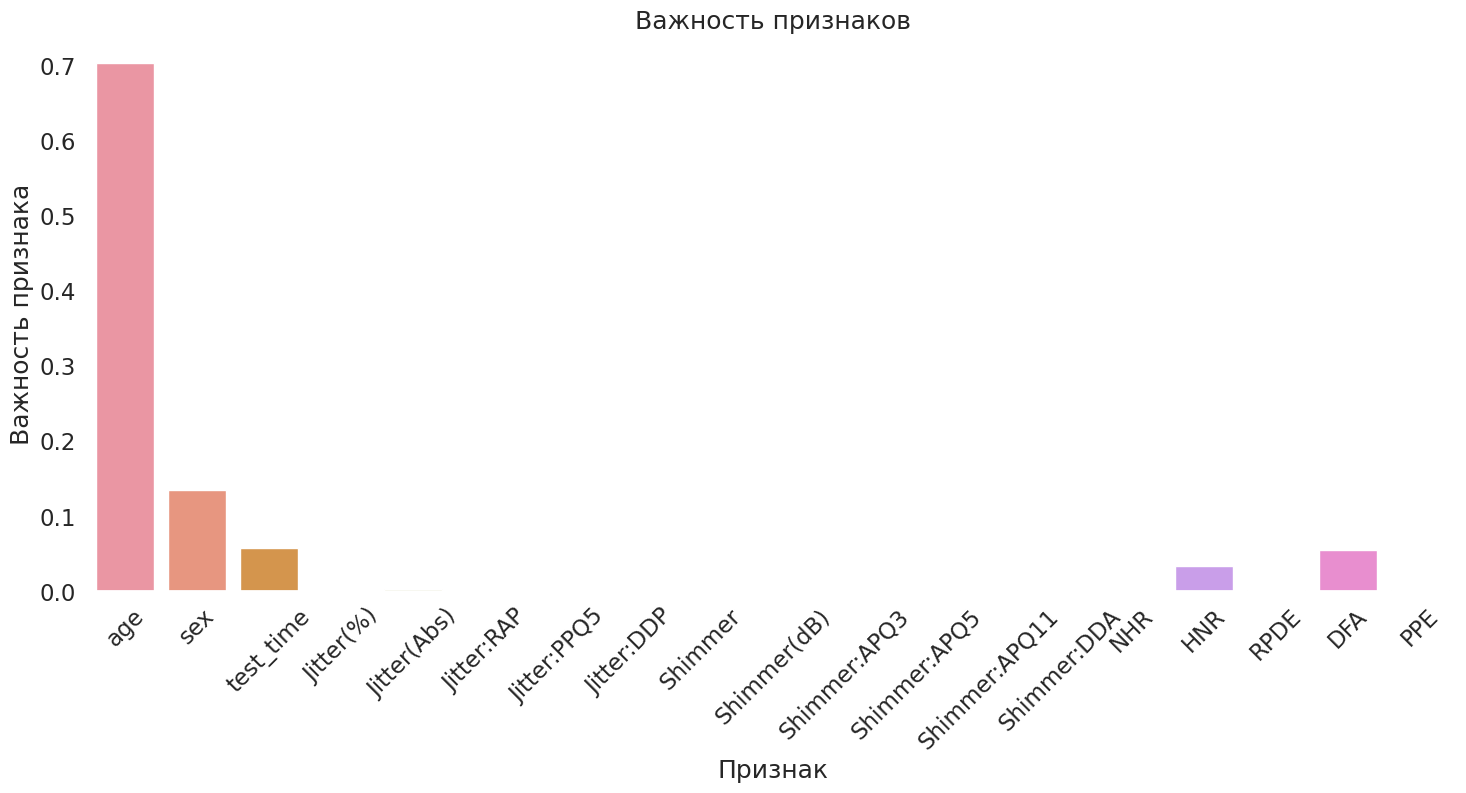

In [122]:
plt.figure(figsize=(15, 8), facecolor='white')

gr = pd.DataFrame({'name': X_train.columns, 'score': forest.feature_importances_})
sns.barplot(x="name", y="score", data=gr)
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Важность признака')
plt.xlabel("Признак")
plt.title("Важность признаков");

Сделайте выводы.

**Вывод:** 
Можно сделать вывод о том. что лес переобучился на трейне.



Можно сказать, что не признаки оажны, но по сравнению с решающим деревом здесб стало тажке важно hnr test time

